In [30]:
%pip install plotly seaborn matplotlib wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.ticker as ticker


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
#Read and inspect the dataset
df=pd.read_csv("C:/Users/Lavanya/Desktop/MSIS Notes/Python/CA2/HRA Dataset/HR_Analytics.csv")
df.info()
df.shape
df.sample(5) # Randomly sample 5 rows from the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
#Data Cleaning and Preprocessing
df.isnull().sum() # Check for null values in the dataframe
df.duplicated().sum() # Check for duplicate values in the dataframe

# Drop the columns that are not needed for analysis
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Fill null values with median
df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns.tolist() # get categorical columns

#convert categorical columns to category type
for col in cat_cols:
    df[col] = df[col].astype('category')



C:\Users\Lavanya\AppData\Local\Temp\ipykernel_11948\2234345374.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [33]:
#Export the cleaned dataset to a new CSV file
df.to_csv("C:/Users/Lavanya/Desktop/MSIS Notes/Python/CA2/HRA Dataset/HRAnalytics_cleaned.csv", index=False)

Loading the Cleaned Dataset and Generating Graphs:

In [34]:
#Read the cleaned dataset
df_clean = pd.read_csv("C:/Users/Lavanya/Desktop/MSIS Notes/Python/CA2/HRA Dataset/HRAnalytics_cleaned.csv")
df_clean.info() # Check the info of the cleaned dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EnvironmentSatisfaction   1480 non-null   int64  
 11  Gender                    1480 non-null   object 
 12  HourlyRate                1480 non-null   int64  
 13  JobInvolvement            1480 non-null   int64  
 14  JobLevel

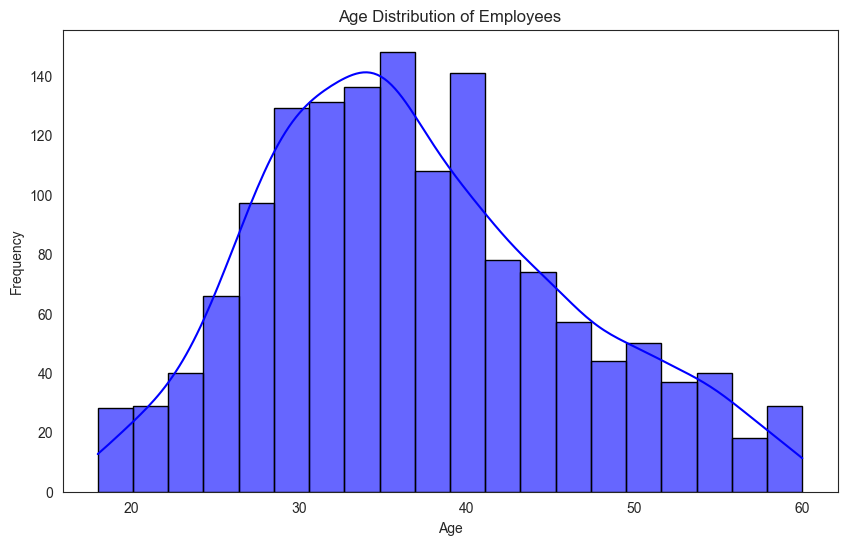

In [35]:
# 1. Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Age'], bins=20, kde=True, color='blue', alpha=0.6, edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

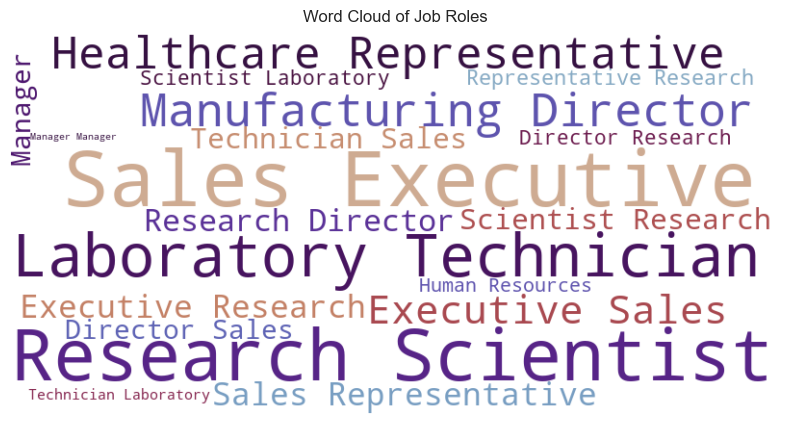

In [36]:
#2. Word Cloud of Job Roles
text = ' '.join(df_clean['JobRole'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='twilight').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Roles')
plt.show()

C:\Users\Lavanya\AppData\Local\Temp\ipykernel_11948\3143276047.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




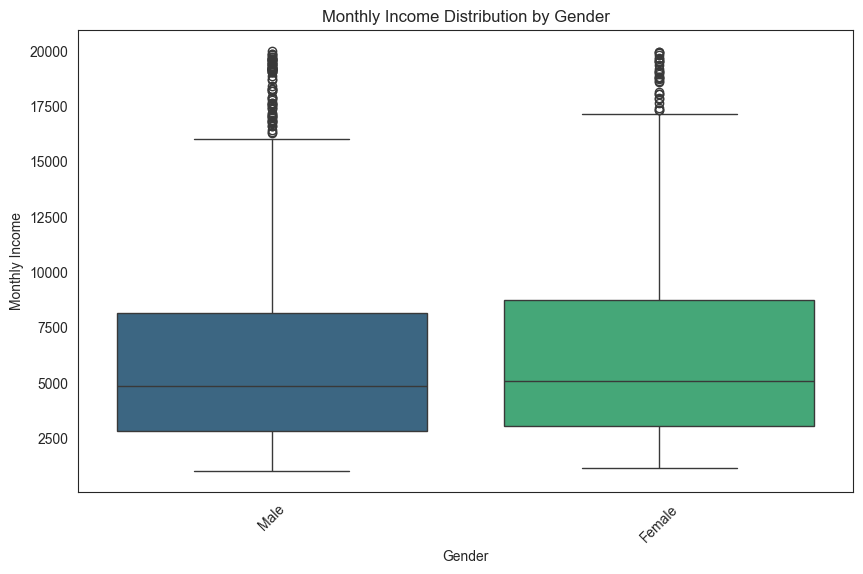

In [37]:
#3. Boxplot of Monthly Income by Gender 
sns.set_style("white")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Gender', y='MonthlyIncome', palette='viridis',)
plt.xticks(rotation=45)
plt.title('Monthly Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.show()

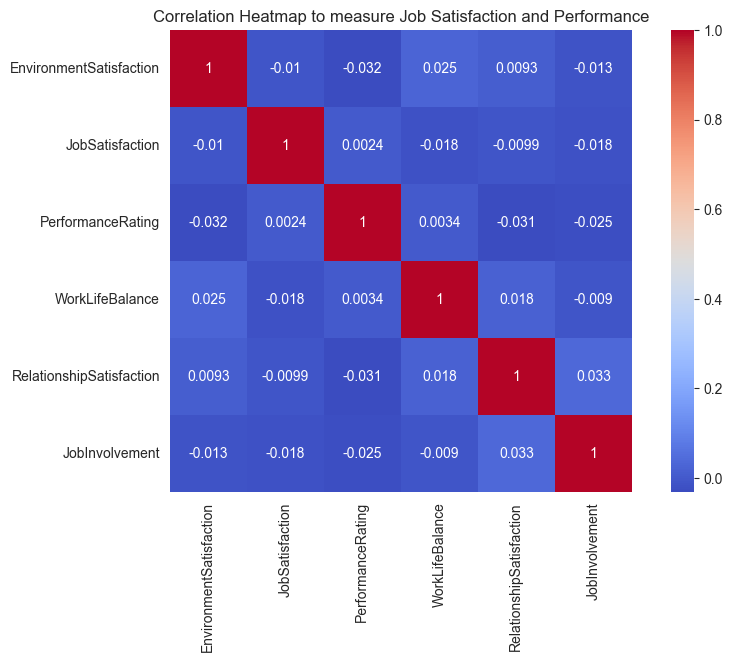

In [38]:
#4. Heatmap of Correlation between Job Satisfaction and Performance
heatmap_columns = ['EnvironmentSatisfaction', 'JobSatisfaction','PerformanceRating','WorkLifeBalance','RelationshipSatisfaction', 'JobInvolvement']
subset_corr = df_clean[heatmap_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap to measure Job Satisfaction and Performance')
plt.show()

C:\Users\Lavanya\AppData\Local\Temp\ipykernel_11948\4095175006.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



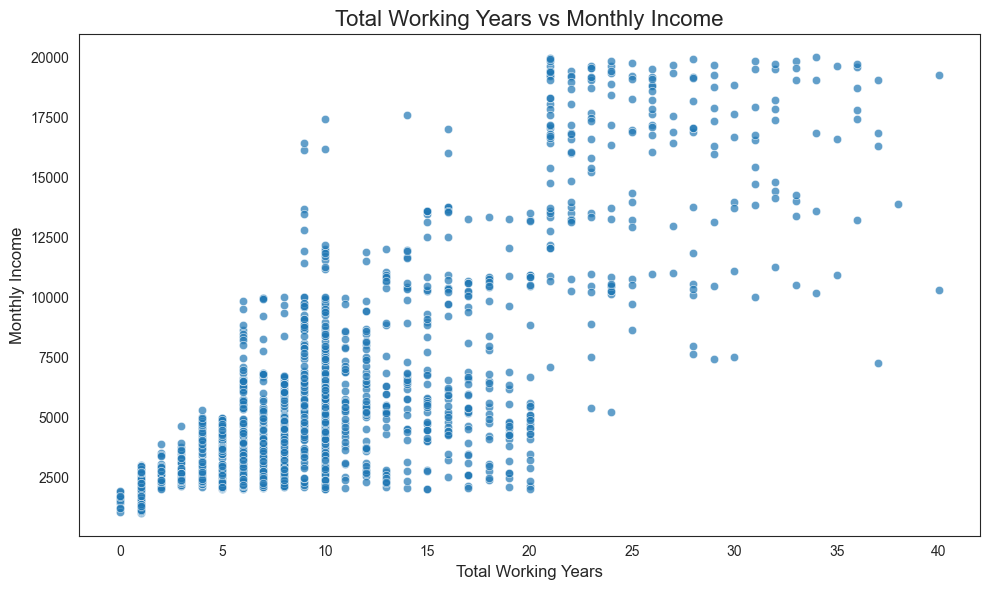

In [39]:
#5. Scatter plot of Total Working Years vs Monthly Income
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_clean,x='TotalWorkingYears', y='MonthlyIncome', palette='viridis', alpha=0.7)

# Plot titles and labels
plt.title('Total Working Years vs Monthly Income', fontsize=16)
plt.xlabel('Total Working Years', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.tight_layout()
plt.show()


In [40]:
#6. Stacked Bar Chart of Average Monthly Income by Gender and Department
income_grouped = df_clean.groupby(['Department', 'Gender'])['MonthlyIncome'].mean().reset_index()

# Creating the grouped bar chart
fig = px.bar(
    income_grouped,
    x='Department',
    y='MonthlyIncome',
    color='Gender',
    barmode='stack',
    title='Average Monthly Income by Department and Gender',
    labels={'MonthlyIncome': 'Average Monthly Income'},
    color_discrete_map={
        'Male': '#0E3386',  
        'Female': '#B22222'  
    }
)

fig.show()  
